In [6]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [7]:
iris = load_iris()

In [8]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
df['target'] = iris.target

In [15]:
df['flowers_name'] = df.target.apply(lambda x: iris.target_names[x])

In [16]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flowers_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [17]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [18]:
#plot them
import matplotlib.pyplot as plt

In [19]:
new0 = df0.drop('flowers_name', axis = 1)
new1 = df1.drop('flowers_name', axis = 1)

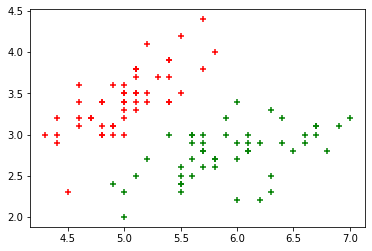

In [20]:
plt.scatter(new0['sepal length (cm)'],new0['sepal width (cm)'] ,color = 'red', marker = '+')
plt.scatter(new1['sepal length (cm)'],new1['sepal width (cm)'] ,color = 'green', marker = '+')


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x = df.drop('target', axis = 1)
y = df['target']

In [23]:
x.drop('flowers_name', axis = 1, inplace = True)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [35]:
len(x_train)

105

In [36]:
len(x_test)

45

In [37]:
from sklearn.svm import SVC

In [74]:
linear = SVC(kernel='linear')
poly = SVC(kernel='poly')
rbf = SVC(kernel='rbf', gamma = 5)

In [91]:
s = SVC()
s.fit(x_train, y_train)
s.score(x_test, y_test)

0.9333333333333333

In [75]:
linear.fit(x_train, y_train)
poly.fit(x_train, y_train)
rbf.fit(x_train, y_train)

SVC(gamma=5)

In [54]:
model.predict(x_test)

array([0, 2, 2, 1, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 0, 1, 2, 1,
       1, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 2,
       1])

In [93]:
print('Accuracy of SVM with linear: ',linear.score(x_test, y_test))
print('Accuracy of SVM with poly: ',poly.score(x_test, y_test))
print('Accuracy of SVM with rbf: ',rbf.score(x_test, y_test))

Accuracy of SVM with linear:  0.9777777777777777
Accuracy of SVM with poly:  0.9777777777777777
Accuracy of SVM with rbf:  0.9555555555555556


In [77]:
from sklearn.linear_model import LogisticRegression

In [79]:
l = LogisticRegression()
l.fit(x_train, y_train)
l.score(x_test, y_test)

G:\ana\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9555555555555556

In [80]:
from sklearn.model_selection import cross_val_score

In [94]:
s1 = cross_val_score(SVC(kernel= 'linear'), x, y, cv = 3)

In [85]:
import numpy as np

In [95]:
np.average(s1)

0.9933333333333333